## Sprint 2
## Team id : PNT2022TMID09252

### Import the necessary packages

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

### Load data

In [33]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Analysis

In [34]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [35]:
X_train[60]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  53,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  84,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [36]:
y_train[60]

4

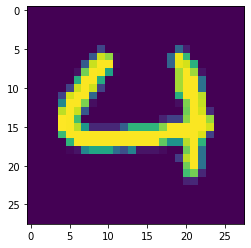

In [37]:
plt.imshow(X_train[60])

### Data Pre-Processing

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [38]:
Y_train[60]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

### Create model

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 207s 110ms/step - loss: 0.2115 - accuracy: 0.9538 - val_loss: 0.0836 - val_accuracy: 0.9720
Epoch 2/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0651 - accuracy: 0.9800 - val_loss: 0.0720 - val_accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0472 - accuracy: 0.9857 - val_loss: 0.0811 - val_accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.0877 - val_accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.1107 - val_accuracy: 0.9732


### Test the model

In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.11065483093261719, 0.9732000231742859]


In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 90ms/step
[[8.33734037e-12 2.69504774e-17 2.24972263e-10 7.11828418e-09
  3.47041310e-16 3.73017928e-14 2.22350880e-17 1.00000000e+00
  2.75763483e-12 1.52603874e-09]
 [3.67089403e-09 1.34238833e-12 1.00000000e+00 1.01283565e-12
  1.40129732e-15 1.80859057e-16 1.82254656e-08 4.47007609e-16
  3.03926641e-11 4.39793568e-17]
 [7.36388328e-09 9.99548495e-01 1.42221692e-08 2.00949656e-11
  5.74085425e-05 1.50519065e-06 7.37218203e-11 1.25703124e-07
  3.92425805e-04 4.41104826e-11]
 [9.99999642e-01 8.68658492e-17 3.69689912e-12 1.04964755e-14
  2.68890596e-13 2.92546543e-11 2.91728863e-09 7.10165095e-14
  3.10449622e-09 3.21168187e-07]]


In [19]:
print(np.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Save the model

In [20]:
model.save("model.h5")

### Test the saved model

In [21]:
model=load_model("model.h5")

In [23]:
img = Image.open("sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 67ms/step
0    0
Name: Label, dtype: int64
